**Processamento Digital de Imagens**

Projeto de deteção de células


In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

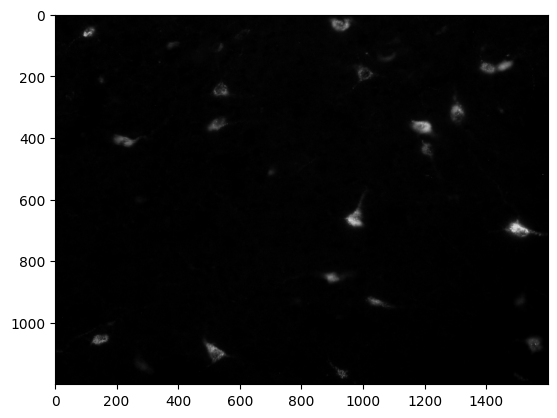

In [2]:
path = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/Mar19bS1C4R2_LHr_200x_y.png"
img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

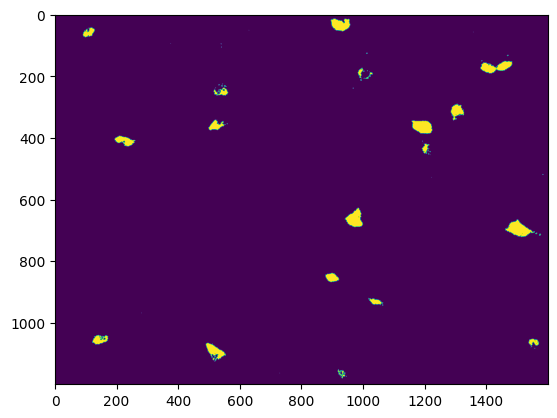

In [3]:
#_, thresholded = cv2.threshold(img1, 210, 255, cv2.THRESH_BINARY)
_, thresholded = cv2.threshold( img1 , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresholded)

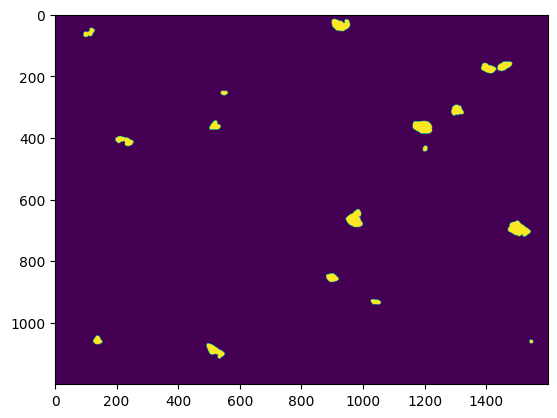

In [4]:
# b) Utilizando abertura com elemento circular de 11 pixels
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 12))  # Elemento estruturante circular de 11 pixels
opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

# Exibir as imagens resultantes
#cv2.imshow('Thresholded Image', thresholded)
plt.imshow( opened_image)

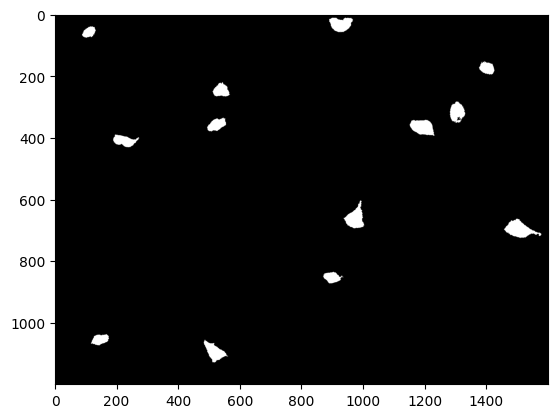

In [5]:
path = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_masks/masks/Mar19bS1C4R2_LHr_200x_y.png"
mask1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

plt.imshow(mask1, cmap='gray', vmin=0, vmax=255);

Text(0.5, 1.0, 'Mask')

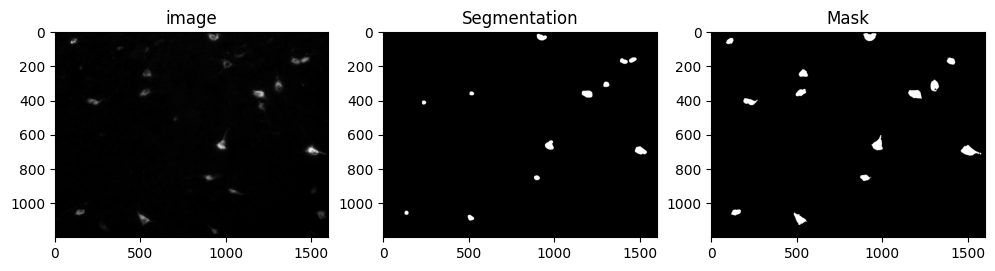

In [63]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))  # Elemento estruturante circular de 11 pixels
opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

path = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_masks/masks/Mar19bS1C4R2_LHr_200x_y.png"
mask1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

axarr[0].imshow(img1, cmap='gray')
axarr[1].imshow(opened_image, cmap='gray')
axarr[2].imshow(mask1, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

In [64]:
segmentation =255- opened_image
mask = 255- mask1

In [65]:
def calculate_accuracy(segmentation_image, mask):
    # Ensure both images have the same shape
    if segmentation_image.shape != mask.shape:
        raise ValueError("Segmentation image and mask shape mismatch")

    # Convert images to grayscale if needed
    if len(segmentation_image.shape) > 2:
        segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
    if len(mask.shape) > 2:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
    TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
    TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
    FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
    FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
    return accuracy

result_accuracy = calculate_accuracy(segmentation, mask1)
print("Accuracy:", result_accuracy)

Accuracy: 0.85671875


In [66]:
# Calculate True Positives, True Negatives, False Positives, False Negatives
TP = np.sum(np.logical_and(segmentation == 255, mask1 == 255))
TN = np.sum(np.logical_and(segmentation == 0, mask1 == 0))
FP = np.sum(np.logical_and(segmentation == 255, mask1 == 0))
FN = np.sum(np.logical_and(segmentation == 0, mask1 == 255))

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
accuracy

0.85671875

In [123]:
def convolution(mat1, mat2):
    return np.sum(mat1 * mat2)

def applyFilter(img, mask):
    varX = int( (mask.shape[0])/2 )
    varY = int( (mask.shape[1])/2 )
    newImg = np.zeros((img.shape[0]-2*varX, img.shape[1]-2*varY))
    for i in range(varX,img.shape[0]-varX):
        for j in range(varY,img.shape[1]-varY):
            newImg[i-varX,j-varY] = convolution(img[i-varX:i-varX+mask.shape[0],
                                                    j-varY:j-varY+mask.shape[1]], mask )
    return newImg

def realcefilter(img, mask, k=1):
    rest00 = applyFilter(img, mask)
    g_mask = img[1:img.shape[0]-1,1:img.shape[1]-1] - rest00
    return img[1:img1.shape[0]-1,1:img1.shape[1]-1] + k*g_mask


Text(0.5, 1.0, 'Mask')

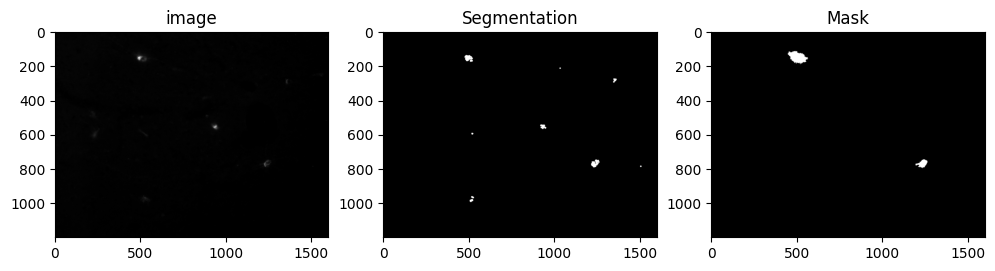

In [25]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathImage = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/Mar20bS2C2R3_LHl_200x_y.png"
pathMask = pathImage.replace("all_images/images", "all_masks/masks")
img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)


#img1 = cv2.GaussianBlur(img1, (3, 3), 200)
image1 = cv2.GaussianBlur(img1, (3, 3), 2)

image = cv2.Laplacian(image1, cv2.CV_64F, ksize=3, scale=0.8)
#img1 = cv2.medianBlur(img1, 3)
#image = np.uint8( (image+image1)) 

grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente en dirección x
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente en dirección y

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

magnitude_gradient = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

_, thresholded = cv2.threshold( magnitude_gradient , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))  # Elemento estruturante circular de 11 pixels
opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

#path = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_masks/masks/Mar19bS1C4R2_LHr_200x_y.png"
mask1 = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)

axarr[0].imshow(img1, cmap='gray')
axarr[1].imshow(opened_image, cmap='gray')
axarr[2].imshow(mask1, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

In [9]:
class Configuration:
    gaussianKernel = 3
    laplacianScale = 1.5
    gradX = 0.5
    gradY = 0.5
    kernel = None
    # result
    accuracy = 0

    def __init__(self, gaussianKernel, laplacianScale, gradX, gradY, kernelSize):
        self.gaussianKernel = gaussianKernel
        self.laplacianScale = laplacianScale
        self.gradX = gradX
        self.gradY = gradY
        self.generateKernel(kernelSize)
    
    def generateKernel(self, size):
        random_kernel = np.random.randint(2, size=(size, size))
        self.kernel = random_kernel
    
    def showConfiguration(self):
        print(f"Configuration: Gaussian Kernel: {self.gaussianKernel}, Laplacian Scale: {self.laplacianScale}, Gradient X: {self.gradX}, Gradient Y: {self.gradY}, Kernel: {self.kernel}, Accuracy: {self.accuracy}")

    def calculateAccuracyBlock(self, listImages):
        self.accuracy = np.mean( [ self.calculateAccuracy(img) for img in listImages ] )

    def calculateAccuracy(self, pathImage):
        #pathImage = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/Mar20bS2C2R3_LHl_200x_y.png"
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")

        img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        image1 = cv2.GaussianBlur(img1, (self.gaussianKernel, self.gaussianKernel), 3)
        image = cv2.Laplacian(image1, cv2.CV_64F, ksize=3, scale=self.laplacianScale)
        grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente en dirección x
        grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente en dirección y
        abs_grad_x = cv2.convertScaleAbs(grad_x)
        abs_grad_y = cv2.convertScaleAbs(grad_y)
        magnitude_gradient = cv2.addWeighted(abs_grad_x, self.gradX, abs_grad_y, self.gradY, 0)
        _, thresholded = cv2.threshold( magnitude_gradient , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        #self.generateKernel()
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
        opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
        mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
        return self.calculate_accuracy(opened_image, mask)
    
    def setAccuracy(self, accuracy):
        self.accuracy = accuracy

    def getAccuracy(self):
        return self.accuracy

    def calculate_accuracy(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
        return accuracy
    
    def get_image_and_mask(self, pathImage):
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")
        img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
        return img1, mask
    
    def calculate_sensitivity(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        sensitivity = TP / (TP + FN) * 100
        return sensitivity
    
    def calculate_specificity(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))

        specificity = TN / (TN + FP) * 100
        return specificity
    
    def calculate_metrics(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100

        sensitivity = TP / (TP + FN) * 100

        specificity = TN / (TN + FP) * 100

        return accuracy, sensitivity, specificity
    
    def calculate_iou(self, mask1, mask2):
        intersection = np.logical_and(mask1, mask2)
        union = np.logical_or(mask1, mask2)
        iou_score = np.sum(intersection) / np.sum(union)
        return iou_score
    
    def calculate_iou_Block(self, listImages):
        iou_scores = []
        for imagePath in listImages:
            img, mask = self.get_image_and_mask(imagePath)
            # Assuming self.accuracy has already been calculated using Jaccard index
            iou_score = self.calculate_iou(img, mask)
            #print(iou_score)
            iou_scores.append(iou_score)
        if iou_scores:
            mean_iou = np.mean(iou_scores)
        else:
            mean_iou = 0.0  # Set default IoU if no scores calculated
        self.accuracy = mean_iou

    def calculate_jaccard_index_Block(self, listImages):
        jaccard_scores = []
        for imagePath in listImages:
            img, mask = self.get_image_and_mask(imagePath)
            jaccard_score = self.calculate_jaccard_index(img, mask)
            jaccard_scores.append(jaccard_score)
        self.accuracy = np.mean( jaccard_scores )
    
    def calculate_jaccard_index(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        intersection = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        union = np.sum(np.logical_or(segmentation_image == 255, mask == 255))

        iou = intersection / union
        return iou
    
    def calculate_log_loss(self, y_pred, y_true):
        epsilon = 1e-15  # Adding a small value to prevent log(0)
        # Clip predicted values to avoid log(0) or log(1)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        # Compute Log Loss
        log_loss = - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        return log_loss
    
    def calculate_log_loss_block(self, listImages, listPredictions):
    # listImages: Paths to the images
    # listPredictions: Predicted probabilities for each image
        log_losses = []
        
        for i, pathImage in enumerate(listImages):
            # Load image, perform processing, and obtain true labels (ground truth)
            processed_image = self.process_image(pathImage)  # Process the image using your defined method
            true_labels = self.get_true_labels(pathImage)  # Get true labels corresponding to the image
            
            # Calculate log loss using predicted probabilities and true labels
            log_loss = self.calculate_log_loss(true_labels, listPredictions[i])
            log_losses.append(log_loss)
        
        mean_log_loss = np.mean(log_losses)
        return mean_log_loss

In [4]:
def generateRandomConfigurations(num_configs):
    configurations = []
    
    for _ in range(num_configs):
        gaussianKernel = random.choice([3,5,7]) # Range for gaussianKernel
        laplacianScale = random.uniform(1.0, 8.0)  # Range for laplacianScale
        randWeight = random.uniform(0.2, 0.8)
        gradX = randWeight  # Range for gradX
        gradY = 1-randWeight  # Range for gradY
        kernelSize = random.choice([3,5,7,9])

        new_config = Configuration(gaussianKernel, laplacianScale, gradX, gradY, kernelSize)
        configurations.append(new_config)

    return configurations

In [5]:
folder_path = 'C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/'  # Replace this with the path to your folder

files_list = []
# Check if the folder path exists
if os.path.exists(folder_path):
    files_list = os.listdir(folder_path)
    files_list = [folder_path + file  for file in files_list]
else:
    print("The specified folder path does not exist.")

In [7]:
selected_files = random.sample(files_list, 250)
random_configs = generateRandomConfigurations(50)

In [8]:
def findBestConfiguration(configurations, selected_files):
    num_configs = len(configurations)
    best_accuracy = -1  
    best_config = None

    for idx, config in enumerate(configurations, 1):
        config.calculateAccuracyBlock(selected_files)

        if config.accuracy > best_accuracy:
            best_accuracy = config.accuracy
            best_config = config
        # Calculate progress percentage
        progress = (idx / num_configs) * 100
        print(f"Progress: {progress:.2f}% Complete", end="\r")  # Print progress message

    print("\nCalculation Complete!")  # Print completion message
    return best_config

findBestConfiguration(random_configs, selected_files)

Progress: 100.00% Complete
Calculation Complete!


In [14]:
def getImageAndMask(pathImage, conf):
    #pathImage = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/Mar20bS2C2R3_LHl_200x_y.png"
    pathMask = pathImage.replace("all_images/images", "all_masks/masks")

    img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
    image1 = cv2.GaussianBlur(img1, (conf.gaussianKernel, conf.gaussianKernel), 3)
    image = cv2.Laplacian(image1, cv2.CV_64F, ksize=3, scale=conf.laplacianScale)
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente en dirección x
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente en dirección y
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    magnitude_gradient = cv2.addWeighted(abs_grad_x, conf.gradX, abs_grad_y, conf.gradY, 0)
    _, thresholded = cv2.threshold( magnitude_gradient , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        #self.generateKernel()
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
    mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
    return opened_image, mask

In [157]:
aux1, aux2 = getImageAndMask(selected_files[8], random_configs[indexMax])

In [10]:
aux = [config.getAccuracy() for config in random_configs]
aux

[87.02909296317544,
 99.25274209122409,
 98.64062357833694,
 97.2322113372098,
 97.97557707425138,
 98.83727661501854,
 99.13835869533382,
 91.33536577716927,
 97.68459405040124,
 98.8526632612656,
 99.16379318232445,
 98.88161298727117,
 97.3562611116225,
 99.23439677686758,
 98.73562570695994,
 91.28913250925802,
 98.75759832883233,
 99.1130830924764,
 99.214460133838,
 93.23457157181163,
 94.70612419420733,
 99.35955611239348,
 99.27109862309904,
 93.38952489565514,
 92.83341165880931,
 98.7814085731248,
 99.30495215588603,
 91.82618629182107,
 98.889806758079,
 98.12768387597272,
 99.25043187432992,
 98.61994230354848,
 98.91755712381092,
 98.4331400055082,
 99.16746025165196,
 98.16898919868085,
 97.397576958988,
 98.18399065019177,
 96.2527681520652,
 99.28818823253795,
 98.05527762857677,
 98.50931579624225,
 99.25236118201941,
 99.14157087552161,
 99.22125503350442,
 98.00084633188247,
 98.06243154733967,
 95.52627981243204,
 99.09559452864542,
 95.51514559933118]

In [11]:
temp = 0
max = 0
indexMax = 0
for index in range(0, len(random_configs)):
    temp = random_configs[index].getAccuracy()
    if max < temp:
        max = temp 
        indexMax = index
        print(indexMax)
    #if temp > 99.3:
    #    print(index)

0
1
21


In [111]:
random_configs[20].showConfiguration()

Configuration: Gaussian Kernel: 5, Laplacian Scale: 2.506604267424071, Gradient X: 0.7029210117333133, Gradient Y: 0.29707898826668666, Kernel: [[0 0 1 1 0 1 0 1 1]
 [0 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1]
 [1 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 1]
 [1 1 1 1 0 1 0 0 0]
 [0 1 0 1 1 0 1 1 0]
 [1 1 1 0 0 0 1 1 0]], Accuracy: 0.04381276192787266


In [22]:
random_configs[21].showConfiguration()

Configuration: Gaussian Kernel: 7, Laplacian Scale: 1.8176141546786135, Gradient X: 0.3193451458431037, Gradient Y: 0.6806548541568963, Kernel: [[1 1 0]
 [1 1 1]
 [1 0 1]], Accuracy: 99.35955611239348


In [74]:
random_configs[17].calculate_iou(aux1, aux2)

0.16828793774319067

Text(0.5, 1.0, 'Mask')

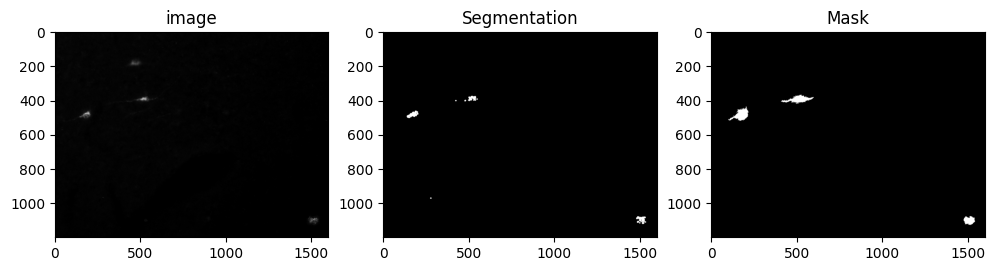

In [28]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[8]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[21])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

Text(0.5, 1.0, 'Mask')

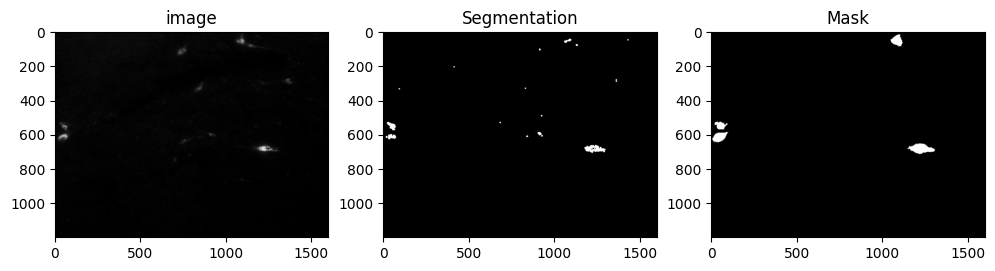

In [30]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[10]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[21])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

Text(0.5, 1.0, 'Mask')

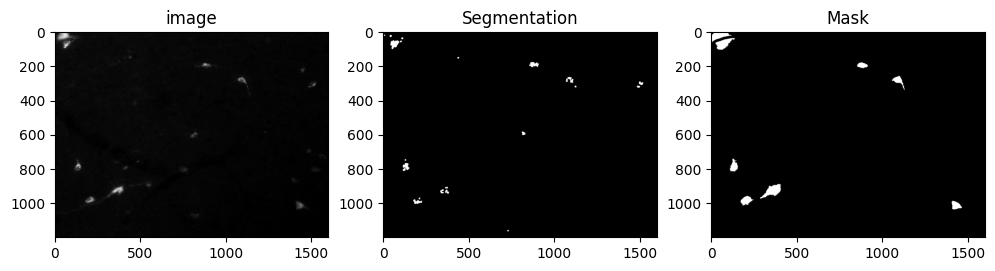

In [31]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[11]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[21])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

Text(0.5, 1.0, 'Mask')

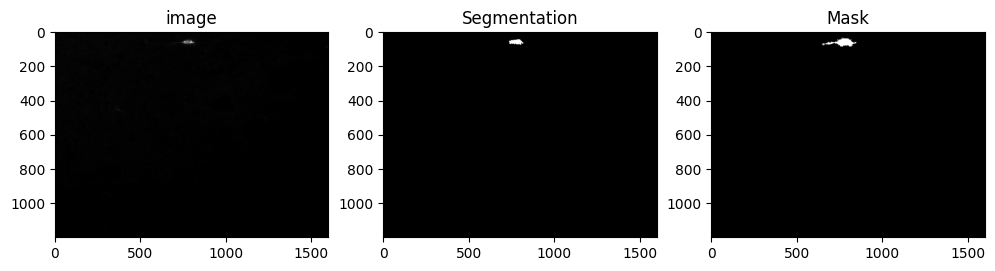

In [32]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[12]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[21])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

Text(0.5, 1.0, 'Mask')

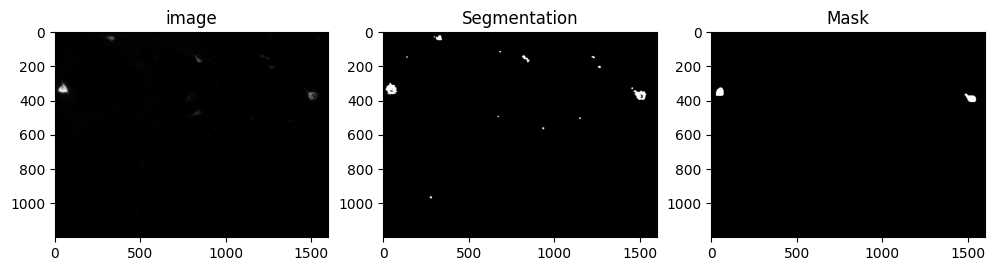

In [35]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[23]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[21])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

Text(0.5, 1.0, 'Mask')

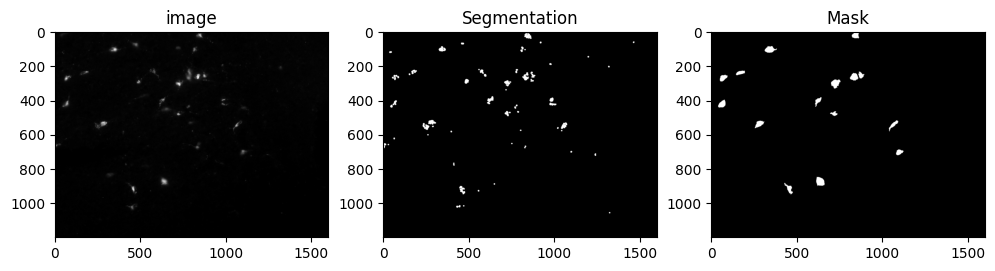

In [38]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[32]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[21])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

Text(0.5, 1.0, 'Mask')

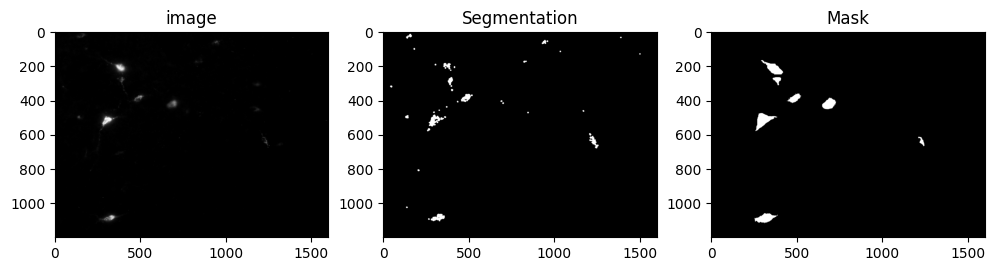

In [39]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[50]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[21])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 